In [1]:
import mysql.connector

In [2]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [3]:
import pandas as pd

In [4]:
interest_rate_addr = "../data/북미 주가지수.xlsx"
df = pd.read_excel(interest_rate_addr, header=6, usecols="A,B")
df.rename(columns={df.columns[0]:"date",
                   df.columns[1]:"stock_index"},
                   inplace=True)
df.set_index(df.columns[0], inplace=True)
df.head(), df.tail()

(         stock_index
 date                
 1956-01          NaN
 1956-02          NaN
 1956-03          NaN
 1956-04          NaN
 1956-05          NaN,
          stock_index
 date                
 2024-04     166.7338
 2024-05     169.2566
 2024-06     168.4892
 2024-07     172.0642
 2024-08     174.2961)

In [5]:
# df.loc["20190901":]
corona_interval = df["2004-08":]
# corona_interval

In [6]:
import numpy as np

In [7]:
month_init = corona_interval.index[0]
month_init

'2004-08'

In [8]:
monthly = []
month = month_init[:]
count = 0
sum = 0.
mean = 0.

past_stock = 0.
now_stock = 0.
rate_of_change = 0.

# print(month)
for index, row in corona_interval.iterrows():
    # print(index, row["k_interest_rate"], row["usa_interest_rate"])
    count = count + 1

    # print(now_month)
    sum = sum + float(row["stock_index"])
    
    now_month = index[:]
    month_info = []

    if month != now_month:
        mean = round(sum / count, 1)

        now_stock = mean

        month_info.append(now_month + str("-01"))
        month_info.append(mean)
        if past_stock != 0.0:
            rate_of_change = round((now_stock - past_stock) / past_stock * 100, 2)
        month_info.append(rate_of_change)

        monthly.append(month_info)

        past_stock = now_stock
        month = now_month
        count = 0
        sum = 0.

monthly

[['2004-09-01', 60.4, 0.0],
 ['2004-10-01', 61.9, 2.48],
 ['2004-11-01', 65.0, 5.01],
 ['2004-12-01', 66.8, 2.77],
 ['2005-01-01', 66.1, -1.05],
 ['2005-02-01', 67.8, 2.57],
 ['2005-03-01', 68.1, 0.44],
 ['2005-04-01', 66.3, -2.64],
 ['2005-05-01', 66.5, 0.3],
 ['2005-06-01', 67.8, 1.95],
 ['2005-07-01', 69.1, 1.92],
 ['2005-08-01', 70.1, 1.45],
 ['2005-09-01', 71.0, 1.28],
 ['2005-10-01', 69.1, -2.68],
 ['2005-11-01', 71.1, 2.89],
 ['2005-12-01', 73.0, 2.67],
 ['2006-01-01', 74.9, 2.6],
 ['2006-02-01', 75.4, 0.67],
 ['2006-03-01', 76.6, 1.59],
 ['2006-04-01', 78.2, 2.09],
 ['2006-05-01', 78.2, 0.0],
 ['2006-06-01', 74.8, -4.35],
 ['2006-07-01', 76.0, 1.6],
 ['2006-08-01', 77.7, 2.24],
 ['2006-09-01', 78.5, 1.03],
 ['2006-10-01', 81.0, 3.18],
 ['2006-11-01', 83.0, 2.47],
 ['2006-12-01', 85.1, 2.53],
 ['2007-01-01', 85.5, 0.47],
 ['2007-02-01', 87.6, 2.46],
 ['2007-03-01', 85.4, -2.51],
 ['2007-04-01', 89.4, 4.68],
 ['2007-05-01', 92.0, 2.91],
 ['2007-06-01', 92.7, 0.76],
 ['2007-07-01'

In [9]:
monthly_df = pd.DataFrame(monthly, columns=["date", "stock_index", "rate_of_change"])
monthly_df.set_index("date", inplace=True)
monthly_df.tail()

,stock_index,rate_of_change
date,,
2024-04-01,166.7,-1.01
2024-05-01,169.3,1.56
2024-06-01,168.5,-0.47
2024-07-01,172.1,2.14
2024-08-01,174.3,1.28


In [10]:
monthly_df.head()

,stock_index,rate_of_change
date,,
2004-09-01,60.4,0.00
2004-10-01,61.9,2.48
2004-11-01,65.0,5.01
2004-12-01,66.8,2.77
2005-01-01,66.1,-1.05


In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.dates as mdates
import datetime

In [12]:
temp = list(monthly_df.index)
len(temp)
np.arange(0, len(temp), 6)

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234])

In [13]:
monthly_df

,stock_index,rate_of_change
date,,
2004-09-01,60.4,0.00
2004-10-01,61.9,2.48
2004-11-01,65.0,5.01
2004-12-01,66.8,2.77
2005-01-01,66.1,-1.05
...,...,...
2024-04-01,166.7,-1.01
2024-05-01,169.3,1.56
2024-06-01,168.5,-0.47


<Figure size 1400x1000 with 0 Axes>

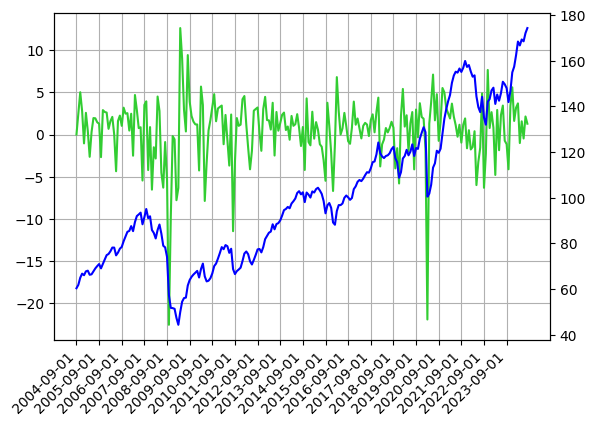

In [14]:
plt.figure(figsize=(14,10))
# plt.plot(monthly_df)

fig, ax1 = plt.subplots()
ax1.plot(monthly_df.index, monthly_df["rate_of_change"], color='limegreen')

ax2 = ax1.twinx()
ax2.plot(monthly_df.index, monthly_df["stock_index"], color='blue')

ax1.grid()
fig.autofmt_xdate(rotation=45)
plt.xticks(np.arange(0, len(temp), 12))#, rotation=45)
# ax1.set_xticks(rotation=45)
plt.show()

In [15]:
import mysql.connector

In [16]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [17]:
# cur = remote.cursor()

# cur.execute("""create table stock_index (
#         date date, 
#         stock_index float)""")

In [20]:
cur = remote.cursor()

sql = open("../sql_script/insert_stock_index.sql").read()
for index, row in monthly_df.iterrows():
    temp = [index, row["stock_index"], row["rate_of_change"]]
    print(temp)
    cur.execute(sql, tuple(temp))
    remote.commit()

cur.execute("select * from stock_index")
result = cur.fetchall()
for row in result:
    print(row)

['2004-09-01', np.float64(60.4), np.float64(0.0)]
['2004-10-01', np.float64(61.9), np.float64(2.48)]
['2004-11-01', np.float64(65.0), np.float64(5.01)]
['2004-12-01', np.float64(66.8), np.float64(2.77)]
['2005-01-01', np.float64(66.1), np.float64(-1.05)]
['2005-02-01', np.float64(67.8), np.float64(2.57)]
['2005-03-01', np.float64(68.1), np.float64(0.44)]
['2005-04-01', np.float64(66.3), np.float64(-2.64)]
['2005-05-01', np.float64(66.5), np.float64(0.3)]
['2005-06-01', np.float64(67.8), np.float64(1.95)]
['2005-07-01', np.float64(69.1), np.float64(1.92)]
['2005-08-01', np.float64(70.1), np.float64(1.45)]
['2005-09-01', np.float64(71.0), np.float64(1.28)]
['2005-10-01', np.float64(69.1), np.float64(-2.68)]
['2005-11-01', np.float64(71.1), np.float64(2.89)]
['2005-12-01', np.float64(73.0), np.float64(2.67)]
['2006-01-01', np.float64(74.9), np.float64(2.6)]
['2006-02-01', np.float64(75.4), np.float64(0.67)]
['2006-03-01', np.float64(76.6), np.float64(1.59)]
['2006-04-01', np.float64(78.2)

In [21]:
remote.close()